Objective:
The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.
Dataset:
Use the breast cancer dataset available in the sklearn library.
Key components to be fulfilled :
1. Loading and Preprocessing
   - Load the breast cancer dataset from sklearn.
   - Preprocess the data to handle any missing values and perform necessary feature scaling.
   - Explain the preprocessing steps you performed and justify why they are necessary for this dataset.
2. Classification Algorithm Implementation
   - Implement the following five classification algorithms:
     1. Logistic Regression
     2. Decision Tree Classifier
     3. Random Forest Classifier
     4. Support Vector Machine (SVM)
     5. k-Nearest Neighbors (k-NN)
   - For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset.
3. Model Comparison
   - Compare the performance of the five classification algorithms.
   - Which algorithm performed the best and which one performed the worst?

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [4]:
# Load the dataset
cancer=load_breast_cancer()
# Convert to DataFrame
df=pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# Checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**There is no missing values in any column**

#### Identify outliers to detect anomalies or unusual data points in the dataset

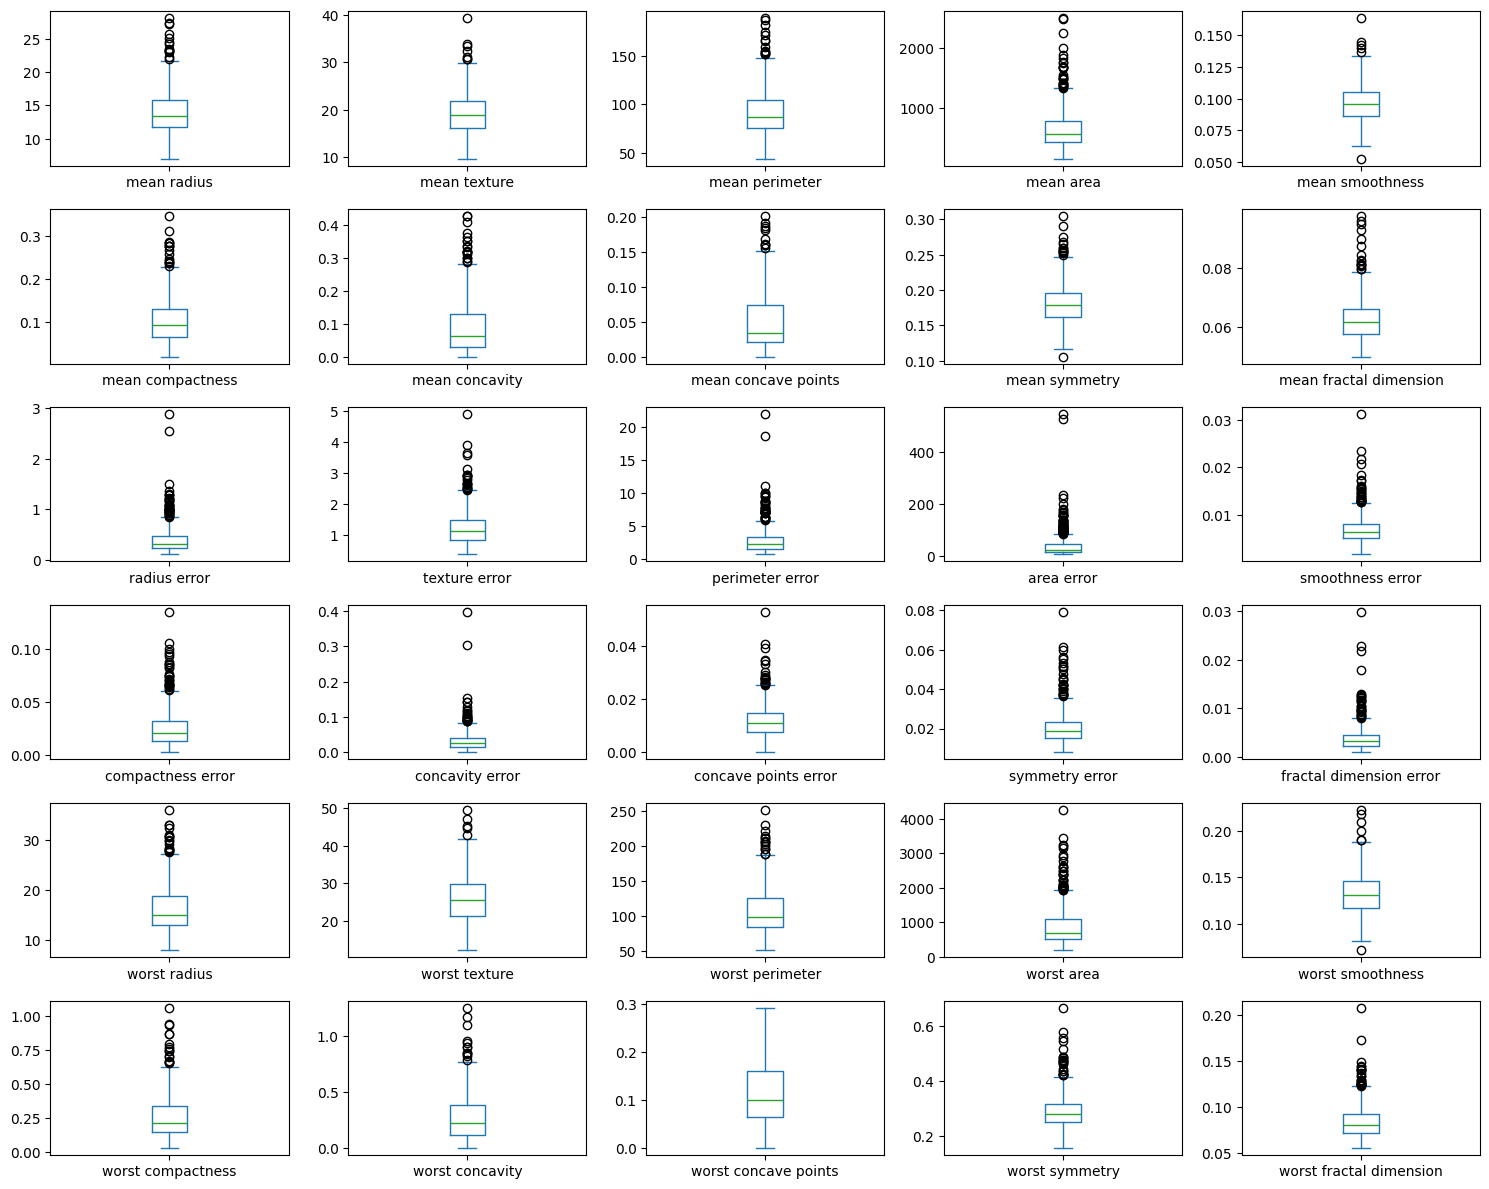

In [8]:
# Plot 
df.drop('target', axis=1).plot(kind='box', figsize=(15, 12), subplots=True, layout=(6, 5))
plt.tight_layout()
plt.show()

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df1 = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [10]:
print(df.shape)
print(df1.shape)

(569, 31)
(398, 31)


In [11]:
# checking for unique values
df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
dtype: int64

**By examining the above output there is no categorical features present in the dataset**

## Split Dataset

In [12]:
from sklearn.model_selection import train_test_split
X=df1.drop('target',axis=1)
y=df1['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


 ## Classification Algorithm Implementation


In [14]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

# predict and evaluate
y_pred_log_reg=log_reg.predict(X_test_scaled)
print("Logistic regression accuracy: ",accuracy_score(y_pred_log_reg,y_test))


Logistic regression accuracy:  0.95


Logistic Regression is a statistical model used for binary classification that predicts the probability of an instance belonging to a certain class. It uses the logistic (sigmoid) function to map any real-valued number into a value between 0 and 1. The output is typically interpreted as the probability that the instance belongs to the positive class.
- Interpretability: Easy to interpret the coefficients, making it useful for understanding the relationship between features and the outcome.
- Binary Classification: The breast cancer dataset is a binary classification problem, making Logistic Regression a suitable choice.
- Linear Relationship: If the relationship between the features and the target is linear, Logistic Regression can perform well.

In [15]:
# 2. Decsion Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_tree = tree_clf.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9375


A Decision Tree Classifier builds a tree-like model of decisions based on feature values. Each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome. The tree is constructed by recursively splitting the dataset based on the best features to minimize impurity (e.g., using Gini impurity or entropy).
- Non-linear Relationships: Decision Trees can capture non-linear relationships between features and the target variable.
- Interpretability: The model is easy to visualize and interpret, making it suitable for understanding important features in the dataset.
- Handling Mixed Data Types: Decision Trees can handle both numerical and categorical data.

In [16]:
# 3. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.925


Random Forest is an ensemble method that combines multiple Decision Trees to improve overall performance and reduce overfitting. It creates a "forest" of trees by training each tree on a random subset of the data and a random subset of features. The final prediction is made by majority voting among all trees.
- Robustness: Reduces overfitting compared to individual Decision Trees and performs well on diverse datasets.
- Feature Importance: Provides insights into feature importance, which is valuable for understanding which features are most influential.
- Versatility: Handles both regression and classification tasks effectively.

In [17]:
# 4. Support Vector Machine
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm_clf.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.95


Support Vector Machine (SVM) finds the hyperplane that best separates the classes in the feature space. It maximizes the margin between the closest points of the classes (support vectors). For non-linear data, SVM can use kernel functions to transform the data into higher dimensions where a linear separation is possible.

- Effective in High Dimensions: SVM is effective in high-dimensional spaces and can handle the complexity of the breast cancer dataset.
- Robust to Overfitting: Especially when the number of dimensions is greater than the number of samples.
- Flexibility with Kernels: Allows the use of different kernels, enabling it to model complex relationships.

In [18]:
# 5. K- Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn_clf.predict(X_test_scaled)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))


k-NN Accuracy: 0.95


The k-NN algorithm classifies an instance based on the majority class among its k nearest neighbors in the feature space. The distance between instances is typically measured using metrics like Euclidean distance. The "k" parameter defines how many neighbors to consider.
- Simplicity: Easy to understand and implement, making it a good baseline model for classification.
- Non-parametric: Does not assume any underlying distribution of the data.
- Locality: Useful in datasets where similar instances are likely to share the same class.

## Model Comparison


Based on the results:

- **Logistic Regression Accuracy**: 0.95
- **Decision Tree Accuracy**: 0.9375
- **Random Forest Accuracy**: 0.925
- **SVM Accuracy**: 0.95
- **k-NN Accuracy**: 0.95

- **Logistic Regression**, **SVM**, and **k-NN** all achieved an accuracy of **0.95**. These models performed equally well on the dataset, indicating that they were able to model the data effectively and make accurate predictions. **Random Forest** had the lowest accuracy of **0.925**. While still performing well overall, it had a slightly lower accuracy compared to the other models. **Decision Tree** achieved an accuracy of **0.9375**, which is better than Random Forest but slightly worse than the top three models.

- The best performers are Logistic Regression, SVM, and k-NN, with 0.95 accuracy.
- The worst performer is Random Forest with an accuracy of 0.925.

The differences in performance between these models are relatively small, which could mean that the dataset is well-suited for various classification techniques. Each of these models has strengths, and the choice of the best model may depend on factors such as interpretability, training time, or scalability for larger datasets.
